In [151]:
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns



%matplotlib inline

# import plotly.io as pio
# pio.renderers

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv(r'./data_out/clean_data_wbo_projects.csv', sep=';')

In [4]:
df.head()

,id,year,name,scope,category,area,location,budget,status,votes,area2
0,1,2016,Plac zabaw na skwerze Bełzy przy Wyższej Szkol...,Projekt rejonowy,place zabaw,"Karłowice-Różanka, Kleczków","Karłowice, Skwer Bełzy przy Wyższej Szkole Ofi...",250000.0,Niewybrany w głosowaniu,326.0,Psie pole
1,2,2016,Rowerowo na północy Wrocławia – budowa ścieżek...,Projekt ogólnomiejski,piesze/rowerowe,projekt ogólnomiejski,Ul. Sułowska od mostu Widawskiego do ronda Obr...,1000000.0,Projekt nie bierze udziału w głosowaniu,NaN,Inne
2,3,2016,Nowe Nadodrze - Aleja Rydygiera [WBO. 2016],Projekt rejonowy,rewitalizacja,"Nadodrze, Ołbin, Stare Miasto, Plac Grunwaldzk...",Ulica Rydygiera - na całej długości,750000.0,Niewybrany w głosowaniu,668.0,Śródmieście
3,4,2016,Budowa nadbrzeża ze slipem dla przyszłej miejs...,Projekt ogólnomiejski,zieleń/rekreacja,projekt ogólnomiejski,brak.,1000000.0,Niewybrany w głosowaniu,3243.0,Inne
4,5,2016,Boisko wielofunkcyjne obok Brodzika na Karłowi...,Projekt rejonowy,zieleń/rekreacja,"Karłowice-Różanka, Kleczków",Karłowice - teren dawnego Brodzika. Obszar zie...,750000.0,Niewybrany w głosowaniu,2238.0,Psie pole


In [5]:
df.groupby('status').agg({'id': 'count'}).sort_values('id', ascending=False)

,id
status,
Niewybrany w głosowaniu,1430
Projekt nie bierze udziału w głosowaniu,1392
Wybrany w głosowaniu,253
Wycofane z realizacji w ramach WBO,250
"Realizowany poza WBO, nie bierze udziału w głosowaniu",81
Realizacja z listy rezerwowej,3


In [152]:
p_all = len(df)
p_pass = p_all - df['status'].str.lower().str.contains('wycofane').sum()
p_vote = p_pass - df['status'].str.lower().str.contains('nie bierze udziału w głosowaniu').sum()
p_picked = len(df[df['status'].isin(['Wybrany w głosowaniu', 'Realizacja z listy rezerwowej', 'Realizowany poza WBO, nie bierze udziału w głosowaniu'])])

category = [
    'Wszystkie projekty', 
    'Projekty spełniające wymogi', 
    'Projekty poddane głosowaniu', 
    'Projekty przeznaczone do realizacji']
value = [
    p_all, 
    p_pass, 
    p_vote, 
    p_picked]


fig = go.Figure()
fig.add_trace(go.Funnel(
        x=category, 
        y=value, 
        textinfo = "value+percent initial", 
        orientation='v',
))

fig.update_layout(title='Droga zgłoszonych projektów', template="seaborn")
fig.show()

- #### Tylko połowa zgłaszanych projektów jest poddawana głosowaniu
- #### Tylko 1 na 10 projektów jest przeznaczana do realizacji
--------------

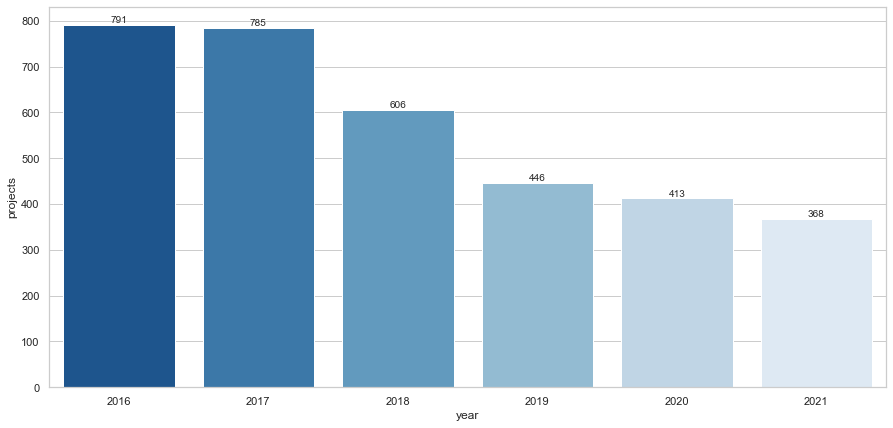

In [160]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='year', y='projects', data=to_plot, palette='Blues_r')
ax.bar_label(ax.containers[0])
plt.show()

- #### Z roku na rok jest co raz mniej projektów
---------------

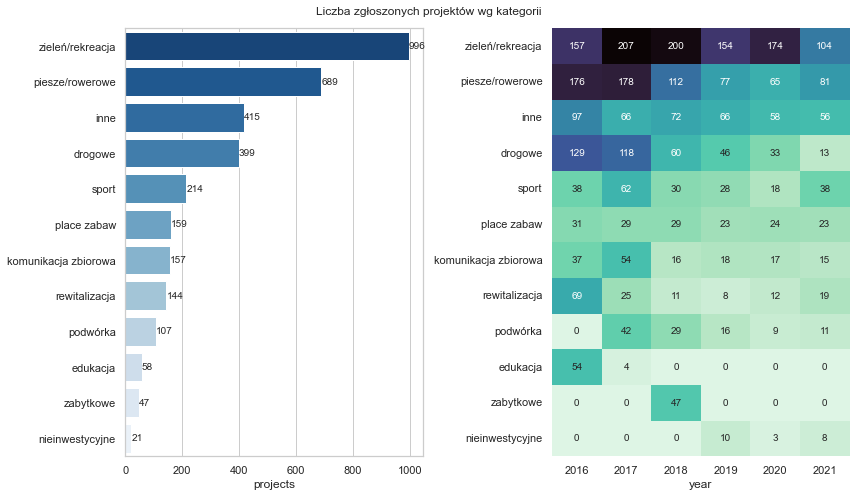

In [158]:
t = df.groupby(['year', 'category']).agg({'id': 'count'}).reset_index().pivot_table(columns='year', index='category')
t2 = pd.DataFrame(t.T.sum(), columns=['projects']).reset_index().sort_values('projects', ascending=False)

t.columns = t.columns.droplevel(0)
t.fillna(0, inplace=True)
t = t.astype('int')
t['all'] = t.T.sum()
t.sort_values('all', ascending=False, inplace=True)
t.drop(columns=['all'], inplace=True)


fig, axes = plt.subplots(1, 2, figsize=(12, 7))
fig.suptitle('Liczba zgłoszonych projektów wg kategorii')

sns.barplot(ax=axes[0], data=t2, x='projects', y='category', palette='Blues_r')
sns.heatmap(ax=axes[1], data=t, annot=True, fmt="d", cbar=False, cmap=sns.cm.mako_r)

# axes.bar_label(axes[0].containers[0])

for a in axes:
    a.set(ylabel=None)

fig.tight_layout()
# print(axes[0].containers)

for bars in axes[0].containers:
    axes[0].bar_label(bars)

- #### Najwięcej projektów było z grupy "zieleń/rekreacja" oraz "piesze/rowerowe" (praktycznie co roku)
- #### Były też takie kategorie, które pojawiły się raz i już do nich nie powrócono np. "zabytkowe"
----------------------

In [162]:
t = df.groupby(['year', 'category']).agg({'id': 'count'}).reset_index().pivot_table(columns='year', index='category')
t.columns = t.columns.droplevel(0)
t.fillna(0, inplace=True)
t = t.astype('int')

fig = px.imshow(t, text_auto=True, color_continuous_scale=px.colors.sequential.Viridis, height=600, width=800)
fig.update_layout(title='Występowanie poszczególnych grup projektów w latach 2016-2021')
fig.show()

In [37]:
t = df.groupby(['year', 'category']).agg({'id': 'count'}).reset_index().pivot_table(columns='year', index='category')
pd.to_numeric(t, downcast='integer')
t

TypeError: arg must be a list, tuple, 1-d array, or Series

In [13]:
# to_plot = df.groupby('category').agg({'id': 'count'}).sort_values('id', ascending=False).reset_index().rename(columns={'id': 'projects'})

# fig = px.bar(to_plot, x='category', y='projects', text_auto='.', template="seaborn")
# fig.show()

In [12]:
# to_plot = df.groupby('year').agg({'id': 'count'}).sort_values('id', ascending=False).reset_index().rename(columns={'id': 'projects'})

# fig = px.bar(to_plot, x='year', y='projects', text_auto='.', template="seaborn")
# fig.show()

In [10]:
fig = px.box(df, x='category', y='budget', color='status')
fig.show()

In [11]:
category = df.groupby('category').agg({'id': 'count'}).sort_values('id', ascending=False).reset_index().rename(columns={'id': 'projects'})
year = df.groupby('year').agg({'id': 'count'}).sort_values('id', ascending=False).reset_index().rename(columns={'id': 'projects'})
scope = df.groupby('scope').agg({'id': 'count'}).sort_values('id', ascending=False).reset_index().rename(columns={'id': 'projects'})
status = df.groupby('status').agg({'id': 'count'}).sort_values('id', ascending=False).reset_index().rename(columns={'id': 'projects'})
area2 = df.groupby('area2').agg({'id': 'count'}).sort_values('id', ascending=False).reset_index().rename(columns={'id': 'projects'})



In [12]:
fig = px.bar(category, x='category', y='projects', text_auto='.', template="seaborn")
fig.show()

In [13]:
fig = px.bar(year, x='year', y='projects', text_auto='.', template="seaborn")
fig.show()

In [14]:
plt.figure(figsize=(15, 7))
sns.barplot(year, x='year', y='projects')
plt.show()

D:\Users\aspr383\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



ValueError: Could not interpret input 'projects'

<Figure size 1080x504 with 0 Axes>

In [291]:
fig = px.bar(scope, x='scope', y='projects', text_auto='.', template="seaborn")
fig.show()

In [292]:
fig = px.bar(status, x='status', y='projects', text_auto='.', template="seaborn")
fig.show()

In [308]:
t = df[df['scope'] == 'Projekt osiedlowy'].groupby(['year', 'area2']).agg({'id': 'count'}).reset_index().pivot_table(columns='year', index='area2')
t.columns = t.columns.droplevel(0)
t.fillna(0, inplace=True)

fig = px.imshow(t, text_auto=True, color_continuous_scale=px.colors.sequential.Viridis, height=600)
fig.update_layout(title='Występowanie poszczególnych grup projektów w latach 2016-2021')
fig.show()

In [297]:
df[df['area2'] == 'Psie pole/Śródmieście']

,id,year,name,scope,category,area,location,budget,status,votes,area2
6,7,2016,Zielona Plaża nad Odrą [WBO. 2016],Projekt rejonowy,zieleń/rekreacja,"Zacisze-Zalesie-Szczytniki, Biskupin-Sępolno-D...",brak.,250000.0,Wybrany w głosowaniu,1891.0,Psie pole/Śródmieście
39,40,2016,"""Swojczycki Park Czarna Woda"" - łódka, kajak,...",Projekt rejonowy,zieleń/rekreacja,"Zacisze-Zalesie-Szczytniki, Biskupin-Sępolno-D...","Pas zieleni między ulicami Swojczycką, Miłoszy...",750000.0,Wybrany w głosowaniu,1970.0,Psie pole/Śródmieście
80,81,2016,Wydzielenie buspasa na Alei Kochanowskiego od ...,Projekt rejonowy,komunikacja zbiorowa,"Zacisze-Zalesie-Szczytniki, Biskupin-Sępolno-D...",brak.,100000.0,Projekt nie bierze udziału w głosowaniu,NaN,Psie pole/Śródmieście
110,111,2016,Trasa rekreacyjna wokół Wielkiej Wyspy [WBO. 2...,Projekt rejonowy,zieleń/rekreacja,"Zacisze-Zalesie-Szczytniki, Biskupin-Sępolno-D...",brak.,250000.0,Projekt nie bierze udziału w głosowaniu,NaN,Psie pole/Śródmieście
112,113,2016,Oświetlenie miejsc niebezpiecznych. Alejka pie...,Projekt rejonowy,piesze/rowerowe,"Zacisze-Zalesie-Szczytniki, Biskupin-Sępolno-D...",brak.,250000.0,Niewybrany w głosowaniu,346.0,Psie pole/Śródmieście
...,...,...,...,...,...,...,...,...,...,...,...
2742,115,2020,KOLEJKĄ LINOWĄ ZE SWOJCZYC NA SĘPOLNO W 7 MINU...,Projekt ponadosiedlowy,komunikacja zbiorowa,"Strachocin-Swojczyce-Wojnów, Biskupin-Sępolno-...",Swojczyce,2000000.0,Projekt nie bierze udziału w głosowaniu,NaN,Psie pole/Śródmieście
2764,137,2020,Remont chodnika po obu stronach ulicy Rychtals...,Projekt osiedlowy,piesze/rowerowe,"Kleczków, Ołbin",brak.,350000.0,Niewybrany w głosowaniu,932.0,Psie pole/Śródmieście
3047,7,2021,"RÓWNE CHODNIKI - takie trudne? Nadodrze, Ołbin...",Projekt ponadosiedlowy,piesze/rowerowe,"Kleczków, Ołbin, Nadodrze",Chodnik na ul. Słowiańskiej \r\nChodnik ul. Ja...,2000000.0,Niewybrany w głosowaniu,2858.0,Psie pole/Śródmieście
3057,17,2021,CZYSTO NAD ODRĄ [WBO. 2021],Projekt ponadosiedlowy,inne,"Nadodrze, Ołbin, Karłowice-Różanka, Kleczków","Bulwary na Nadodrzu, bulwary/wały na Kleczkowi...",200000.0,Projekt nie bierze udziału w głosowaniu,NaN,Psie pole/Śródmieście


In [306]:
df[df['scope'] == 'Projekt rejonowy'].groupby(['year', 'area2']).agg({'id': 'count'}).reset_index().pivot_table(columns='year', index='area2')

id              
year                       2016   2017   2018
area2                                        
Fabryczna                 166.0  156.0  160.0
Fabryczna/Krzyki           56.0   47.0   15.0
Inne                        NaN    NaN    1.0
Krzyki                    174.0  192.0  129.0
Psie pole                 104.0   92.0   83.0
Psie pole/Śródmieście      46.0   44.0    1.0
Stare miasto                NaN    NaN   23.0
Stare miasto/Śródmieście    NaN    NaN    2.0
Śródmieście               101.0   94.0   41.0